# 1. Import and Install Dependencies

In [7]:
!pip install mediapipe

  Using cached mediapipe-0.10.11-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.6 MB)
     |████████████████████████████████| 1.0 MB 599 kB/s eta 0:00:01
     |████████████████████████████████| 68.3 MB 110 kB/s eta 0:00:01    |███▋                            | 7.8 MB 1.6 MB/s eta 0:00:39     |███████████████████▎            | 41.1 MB 1.6 MB/s eta 0:00:18
     |████████████████████████████████| 755.5 MB 4.5 kB/s eta 0:00:016     |██████████████████████████▌     | 624.9 MB 1.4 MB/s eta 0:01:32
     |████████████████████████████████| 71.6 MB 714 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.1 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 166.0 MB 43 kB/s  eta 0:00:01
     |████████████████████████████████| 410.6 MB 4.2 kB/s eta 0:00:01█▋                

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-05-05 15:10:56.676770: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 15:10:57.588501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 15:11:00.721354: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 15:11:00.728343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 15:11:04.319999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [74]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        
        time.sleep(2)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1711666804.617384    3547 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1711666804.618162   16187 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [40]:
len(results.pose_landmarks.landmark)

33

In [38]:
len(results.face_landmarks.landmark)

468

In [75]:
draw_landmarks(frame, results)

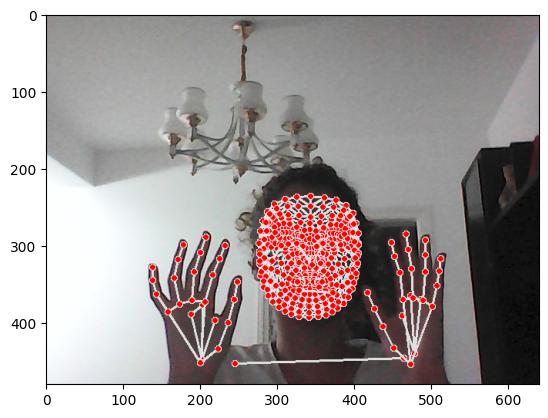

In [76]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [77]:
len(results.right_hand_landmarks.landmark)

21

In [81]:
len(results.face_landmarks.landmark)

468

In [82]:
len(results.pose_landmarks.landmark)

33

In [83]:
len(results.left_hand_landmarks.landmark)

21

In [78]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [79]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [145]:
#result_test = extract_keypoints(results)

In [86]:
result_test

array([ 0.54010761,  0.67735285, -0.79845786, ...,  0.21566239,
        0.68497872, -0.04607214])

In [87]:
468*3+33*4+21*3+21*3

1662

In [88]:
np.save('0', result_test)

In [7]:
np.load('0.npy')

array([ 0.54010761,  0.67735285, -0.79845786, ...,  0.21566239,
        0.68497872, -0.04607214])

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA') 

# Actions that we try to detect
actions = np.array([ 'forward', 'backward', 'stop', 'left', 'right'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

In [8]:
# hello
## 0  name of the folders for each videos aka sequence
## 1
## 2
## ...
## 29
#forward
#backward
#stop
#left
#right
# thanks


In [14]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [15]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)
#                 #print(results)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

I0000 00:00:1711717990.973010    2893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1711717990.974894    4003 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)


# 6. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'forward': 0, 'backward': 1, 'stop': 2, 'left': 3, 'right': 4}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
np.array(window).shape

(30, 1662)

In [17]:
np.array(sequences).shape

(300, 30, 1662)

In [18]:
np.array(labels).shape

(300,)

In [19]:
X = np.array(sequences)

In [20]:
X.shape

(300, 30, 1662)

In [21]:
y = to_categorical(labels).astype(int)

In [22]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [23]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3)

In [24]:
y_holdout.shape

(90, 5)

In [25]:
y_train.shape

(210, 5)

In [26]:
X_test, X_val, y_test, y_val = train_test_split(X_holdout,y_holdout, test_size = 0.5)

In [27]:
X_train.shape

(210, 30, 1662)

In [28]:
y_train.shape

(210, 5)

In [29]:
X_val.shape

(45, 30, 1662)

In [30]:
y_val.shape

(45, 5)

In [31]:
X_test.shape

(45, 30, 1662)

In [32]:
y_test.shape

(45, 5)

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
def create_lstm_model(units_lstm1=64, units_lstm2=256,units_lstm3=200, dropout_rate=0.1, units_dense1=150, units_dense2=32):
    model = Sequential()
    model.add(LSTM(units_lstm1, return_sequences=True, activation='relu', input_shape=(30, 1662)))
    model.add(LSTM(units_lstm2, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units_lstm3, return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units_lstm2, return_sequences=False, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units_dense1, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units_dense2, activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    # early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=13, restore_best_weights=True)
    return model




In [77]:
# lstm_model = KerasClassifier(model=create_lstm_model,units_lstm1=64,units_lstm2=128,units_lstm3=64, dropout_rate=0.2,units_dense1=64,units_dense2=32, verbose=1)

In [36]:
lstm_model = create_lstm_model()

In [37]:
lstm_model.fit(X_train, y_train, epochs=1000, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/1000
7/7 [==============================] - 6s 263ms/step - loss: 1.6169 - categorical_accuracy: 0.1619 - val_loss: 1.6085 - val_categorical_accuracy: 0.2444
Epoch 2/1000
7/7 [==============================] - 1s 160ms/step - loss: 1.6236 - categorical_accuracy: 0.2000 - val_loss: 1.5913 - val_categorical_accuracy: 0.2222
Epoch 3/1000
7/7 [==============================] - 1s 155ms/step - loss: 1.5786 - categorical_accuracy: 0.2762 - val_loss: 1.5473 - val_categorical_accuracy: 0.2222
Epoch 4/1000
7/7 [==============================] - 1s 155ms/step - loss: 1.5937 - categorical_accuracy: 0.2429 - val_loss: 1.6381 - val_categorical_accuracy: 0.1333
Epoch 5/1000
7/7 [==============================] - 1s 154ms/step - loss: 1.5697 - categorical_accuracy: 0.2333 - val_loss: 1.5440 - val_categorical_accuracy: 0.2667
Epoch 6/1000
7/7 [==============================] - 1s 152ms/step - loss: 1.4942 - categorical_accuracy: 0.2667 - val_loss: 1.5553 - val_categorical_accuracy: 0.2000
Epoc

In [48]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

# 8. Make Predictions

In [38]:
y_pred = lstm_model.predict(X_test)

2/2 [==============================] - 1s 37ms/step


In [47]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# # Evaluate the best model on the test set
# best_model = grid.best_estimator_
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test accuracy: {accuracy}")


In [39]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 30, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 200)           365600    
                                                                 
 dropout_1 (Dropout)         (None, 30, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               467968    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [40]:
res[0]

0.4476729929447174

In [41]:
actions

array(['forward', 'backward', 'stop', 'left', 'right'], dtype='<U8')

In [42]:
actions[np.argmax(res[0])]

'forward'

In [43]:
actions[np.argmax(y_test[0])]

'left'

In [44]:
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

# 9. Save Weights

In [155]:
# model.save('action.h5')

/home/leyna/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
# del model

In [35]:
#Model weights with 30 videos 
#model.load_weights('action.h5')

In [245]:
# #Saving model for MP_DATA with 60 sequences
# model.save('action2.h5')
# model.load_weights('action2.h5')

/home/leyna/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
lstm_model.save('best_model.h5')

/home/leyna/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
lstm_model.load_weights('best_model.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = lstm_model.predict(X_test)

2/2 [==============================] - 0s 33ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
ytrue

[3,
 3,
 1,
 4,
 3,
 1,
 3,
 4,
 0,
 4,
 4,
 3,
 1,
 2,
 4,
 4,
 3,
 4,
 0,
 1,
 3,
 4,
 0,
 2,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 3,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 0,
 2,
 0,
 2]

In [49]:
yhat

[3,
 4,
 1,
 4,
 3,
 2,
 3,
 4,
 0,
 4,
 4,
 4,
 1,
 2,
 4,
 4,
 3,
 4,
 0,
 1,
 4,
 4,
 0,
 2,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 4,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 0,
 2,
 0,
 2]

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[40,  0],
        [ 0,  5]],

       [[37,  0],
        [ 1,  7]],

       [[35,  1],
        [ 0,  9]],

       [[36,  0],
        [ 4,  5]],

       [[27,  4],
        [ 0, 14]]])

In [51]:
actions

array(['forward', 'backward', 'stop', 'left', 'right'], dtype='<U8')

In [52]:
accuracy_score(ytrue, yhat)

0.8888888888888888

# 11. Test in Real Time

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245),(117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [44]:
#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

In [45]:
#sequence.reverse()

In [23]:
len(sequence)

1

In [51]:
#sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [54]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.95

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = lstm_model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1714918591.659687    2784 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714918591.664223    3626 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)